Competition Link: https://www.kaggle.com/c/customerattritionprediction/leaderboard

# Customer Attrition Prediction
### Determine the Customer Attrition from the given dataset

**My Final rank out of 178 Participants**

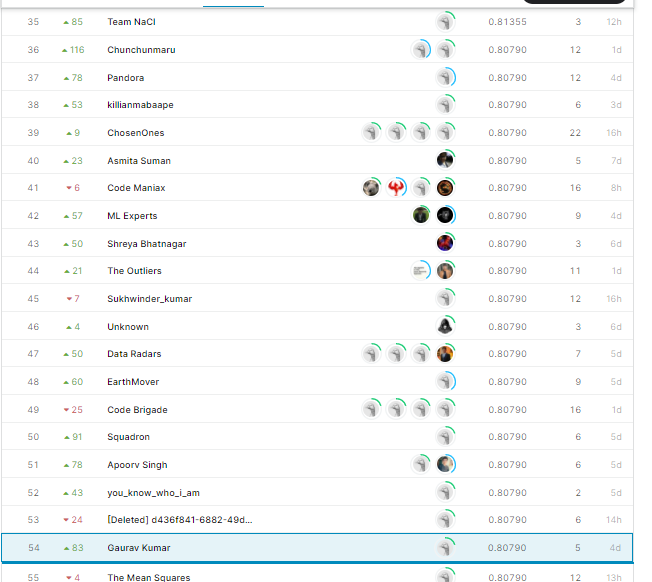

## Problem Statement

The training dataset contains 6338 samples and the testset contains 705 samples. Each sample contains 15 features and 1 prediction variable "CustomerAttrition" which indicates the class of the sample. The 15 input features and 1 prediction variable are:

    "ID", string, the Customer ID allocated to each customer,

    "sex", string, the gender of the person,

    "Aged", Boolean, the gender of the person,

    "Married", Boolean, The marrital status of the person,

    "TotalDependents", Boolean, Tells whether the person is dependent or independent,

    "ServiceSpan", numerical, gives the timespan of the service taken by the person,

    "4GService",string, the intenet service taken by the person ,

    "CyberProtection", Boolean, tells if cyber protection plan of company is taken by the person or not

    "HardwareSupport", Boolean, tells if hardware support plan of company is taken by the person or not,

    "TechnicalAssistance", Boolean, tells if technical assistance of company is taken by the person or not,,

    "FilmSubscription", Boolean, tells whether the person has subscribed for films,

    "SettlementProcess", string, The payment process chosen by the person,

    "QuarterlyPayment", numerical, The quaterly payment made by the person,

    "GrandPayment", numerical, The cummalative payment made by the person,

    "CustomerAttrition", Boolean, The choice of continuation of services taken by the customer,

## Objective

Your task is to predict the customer Attrition for each customer in the given dataset using data science models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# to ignore warnings
import warnings as wg
wg.filterwarnings("ignore")

In [3]:
pd.set_option('max_rows', None)

**Loading Data**

In [4]:
data = pd.read_csv('train.csv')

In [5]:
data.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes
3,YZ43L1UQUQACTL1PXXZG,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No
4,6P28152QGF60PDLSCB9M,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6338 non-null   object 
 1   sex                  6338 non-null   object 
 2   Aged                 6338 non-null   object 
 3   Married              6338 non-null   object 
 4   TotalDependents      6338 non-null   object 
 5   ServiceSpan          6338 non-null   int64  
 6   MobileService        6338 non-null   object 
 7   4GService            6338 non-null   object 
 8   CyberProtection      6338 non-null   object 
 9   HardwareSupport      6338 non-null   object 
 10  TechnicalAssistance  6338 non-null   object 
 11  FilmSubscription     6338 non-null   object 
 12  SettlementProcess    6338 non-null   object 
 13  QuarterlyPayment     6338 non-null   float64
 14  GrandPayment         6328 non-null   float64
 15  CustomerAttrition    6338 non-null   o

In [7]:
data.columns

Index(['ID', 'sex', 'Aged', 'Married', 'TotalDependents', 'ServiceSpan',
       'MobileService', '4GService', 'CyberProtection', 'HardwareSupport',
       'TechnicalAssistance', 'FilmSubscription', 'SettlementProcess',
       'QuarterlyPayment', 'GrandPayment', 'CustomerAttrition'],
      dtype='object')

**Describing continuous numerical data**

In [8]:
data[['ServiceSpan','QuarterlyPayment', 'GrandPayment']].describe()

,ServiceSpan,QuarterlyPayment,GrandPayment
count,6338.000000,6338.000000,6328.000000
mean,31.946040,64.814490,2290.544207
std,24.559659,30.191091,2265.181098
min,-2.000000,16.504109,16.297961
25%,8.000000,35.645524,401.849530
50%,29.000000,70.534085,1407.589119
75%,55.000000,90.058498,3823.855846
max,73.000000,120.159190,8685.848657


We can clearly see that ServiceSpan has negative minimum value which is not possible and requires to be changed

**Describing categorical data**

In [9]:
data[['sex', 'Aged', 'Married', 'TotalDependents',
       'MobileService', '4GService', 'CyberProtection', 'HardwareSupport',
       'TechnicalAssistance', 'FilmSubscription', 'SettlementProcess',
         'CustomerAttrition']].describe()

,sex,Aged,Married,TotalDependents,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,CustomerAttrition
count,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338
unique,2,2,2,2,2,3,2,2,2,2,4,2
top,Male,No,No,No,Yes,Wifi Broadband,No,No,No,No,Electronic,No
freq,3213,5309,3273,4432,5772,2794,4508,4185,4508,3908,2134,4658


**Train Test Split**

In [10]:
x = data.drop('CustomerAttrition', axis = 'columns')
y = data['CustomerAttrition']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

## EDA 

In [13]:
X_train.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment
769,JKYY5PT93J01YZURG87Z,Female,Yes,No,No,55,Yes,Wifi Broadband,No,No,No,No,Electronic,89.804996,4931.437050
1456,QX0XLEX7HXRG48BOKCZQ,Male,Yes,Yes,No,58,Yes,Wifi Broadband,No,Yes,No,No,Electronic,98.339137,5867.204745
6326,L7IWX3NGYEP4ZWQKOLD6,Male,No,No,No,51,Yes,Wifi Broadband,Yes,Yes,Yes,No,Check,99.021300,5425.362193
2257,4HLMBLI3Q5A7Y7AIUPAO,Female,No,No,No,41,Yes,Wifi Broadband,No,Yes,No,No,Bank,93.703441,3756.520276
5962,Q1GRME3SWBF3XFNEEBQ7,Male,No,No,No,-1,Yes,Wifi Broadband,No,No,No,No,Check,45.824503,46.005585


In [14]:
# Dropping ID column
X_train = X_train.drop('ID', axis = 'columns')

In [15]:
X_train.columns

Index(['sex', 'Aged', 'Married', 'TotalDependents', 'ServiceSpan',
       'MobileService', '4GService', 'CyberProtection', 'HardwareSupport',
       'TechnicalAssistance', 'FilmSubscription', 'SettlementProcess',
       'QuarterlyPayment', 'GrandPayment'],
      dtype='object')

In [16]:
# Separating numerical and categorical data to understand better 

num = ['ServiceSpan','QuarterlyPayment', 'GrandPayment']
cat = ['sex', 'Aged', 'Married', 'TotalDependents', 
       'MobileService', '4GService', 'CyberProtection', 'HardwareSupport',
       'TechnicalAssistance', 'FilmSubscription', 'SettlementProcess']

In [17]:
plt.style.use('ggplot')

In [18]:
pair = pd.concat([X_train, Y_train], axis = 'columns')

**Checking out numerical features**

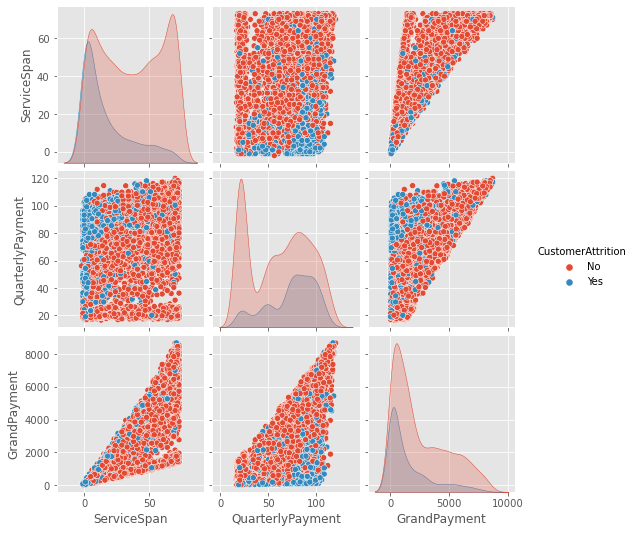

In [19]:
# Pair plot for numerical features
sns.pairplot(vars = num, data = pair, hue = 'CustomerAttrition')

    We can clearly see that ServiceSpan and GrandPayment are strongly correlated 
    And ServiceSpan and QuaterlyPayment are not correlated at all

<AxesSubplot:>

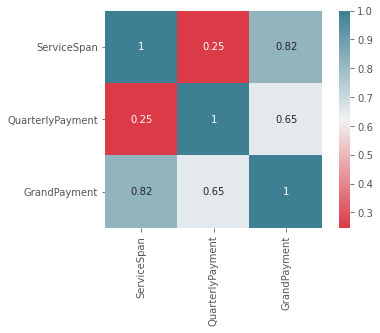

In [20]:
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(X_train[num].corr(), 
            annot = True, square = True,
           cmap = colormap)

In [21]:
Y_train.value_counts()

No     3726
Yes    1344
Name: CustomerAttrition, dtype: int64

<AxesSubplot:xlabel='CustomerAttrition', ylabel='count'>

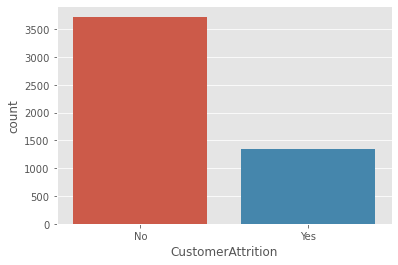

In [22]:
# Visualizing the value count of customer attribution
sns.countplot(Y_train)

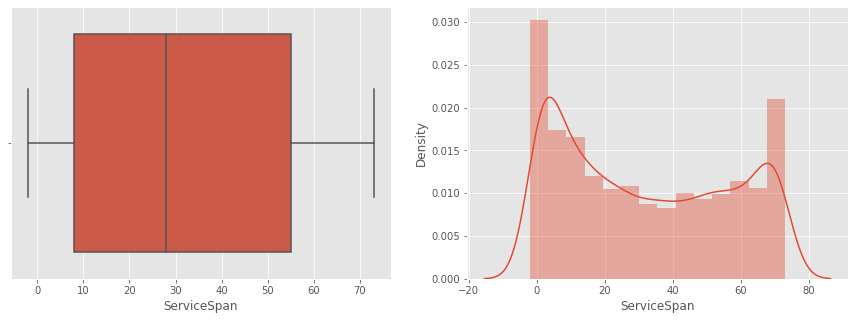

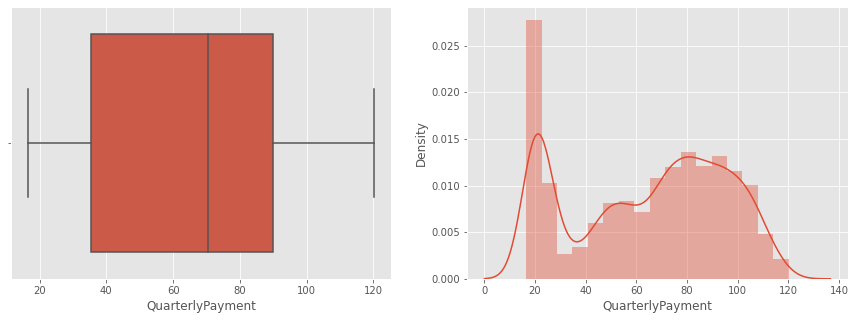

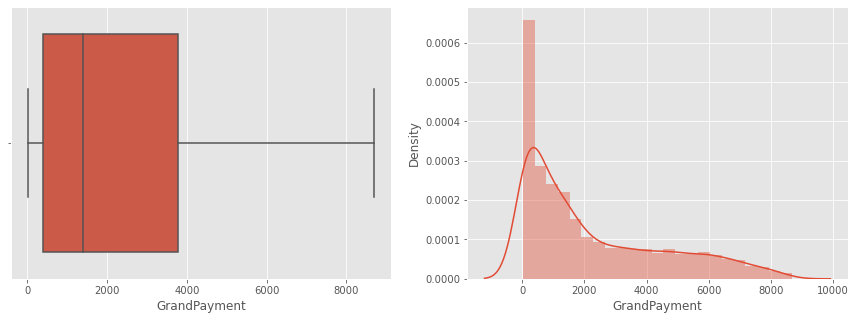

In [23]:
for i in num:
#    plt.figure(figsize = (12, 6))
    fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
#    plt.subplot(index+1,2,1)
    sns.boxplot(x = i , data = X_train, ax = axes[0])
    
#    plt.subplot(index+1, 2, 2)
    sns.distplot(X_train[i], ax = axes[1])

In [24]:
# Checking null values in the columns
X_train.isna().sum()

sex                    0
Aged                   0
Married                0
TotalDependents        0
ServiceSpan            0
MobileService          0
4GService              0
CyberProtection        0
HardwareSupport        0
TechnicalAssistance    0
FilmSubscription       0
SettlementProcess      0
QuarterlyPayment       0
GrandPayment           9
dtype: int64

So, GrandPayment contains 9 missing value which are needed to be imputed

In [25]:
X_train.columns

Index(['sex', 'Aged', 'Married', 'TotalDependents', 'ServiceSpan',
       'MobileService', '4GService', 'CyberProtection', 'HardwareSupport',
       'TechnicalAssistance', 'FilmSubscription', 'SettlementProcess',
       'QuarterlyPayment', 'GrandPayment'],
      dtype='object')

In [26]:
mean_payments = X_train[['QuarterlyPayment','GrandPayment','ServiceSpan']].groupby(['ServiceSpan']).mean()
mean_payments = mean_payments.reset_index()
mean_payments

,ServiceSpan,QuarterlyPayment,GrandPayment
0,-2,56.157994,NaN
1,-1,52.300855,51.977262
2,0,52.989972,66.646735
3,1,52.434982,98.285701
4,2,52.657671,101.568659
5,3,55.976962,186.772219
6,4,56.945443,242.816066
7,5,60.111383,309.090778
8,6,60.322608,382.183734
9,7,53.281573,401.345414


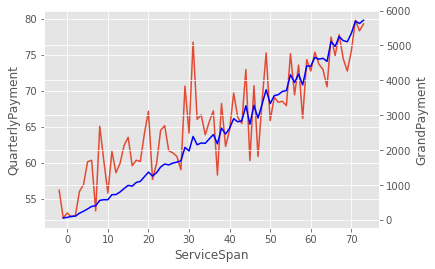

In [27]:
ax = sns.lineplot(x = 'ServiceSpan', y = 'QuarterlyPayment', data = mean_payments)
ax2 = ax.twinx()
sns.lineplot(x = 'ServiceSpan', y = 'GrandPayment', data = mean_payments, ax=ax2, color = 'b')
plt.show()

 We can also see that some ServiceSpan has negative and 0 values, Let's explore them also

In [28]:
X_train[X_train['ServiceSpan'] <= 0].shape

(273, 14)

In [29]:
X_train[X_train['ServiceSpan'] <= 0].shape

(273, 14)

So, 273 Customers have either 0 or lesser than 0 ServiceSpan, Now Let's dive deep

In [30]:
X_train.shape

(5070, 14)

In [31]:
X_train[X_train['ServiceSpan'] <= 0]['ServiceSpan'].value_counts()

 0    164
-1    108
-2      1
Name: ServiceSpan, dtype: int64

<AxesSubplot:>

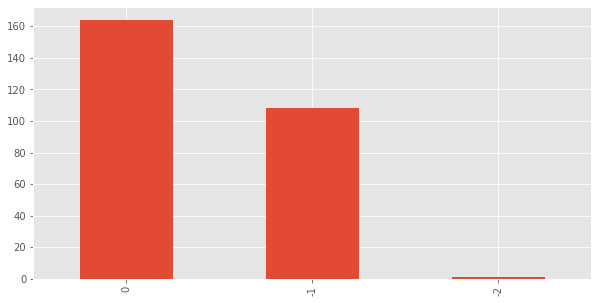

In [32]:
plt.figure(figsize = (10, 5))
X_train[X_train['ServiceSpan'] <= 0]['ServiceSpan'].value_counts().plot(kind = 'bar')

Comparing with the record of 5070 customers only 109 have negative ServiceSpan

Only 1 value has -2 ServiceSpan which should be merged with other values

In [33]:
negative_span_index = X_train[X_train['ServiceSpan'] < 0].index
negative_span_index

Int64Index([5962,  921, 4330, 3460, 1186, 3192, 5907,  547, 1290, 3331,
            ...
            2397, 5272, 4307, 3804, 2390, 2472, 3288, 6060, 3687, 4050],
           dtype='int64', length=109)

In [34]:
negative_span = pd.concat([X_train[X_train['ServiceSpan'] < 0], Y_train[negative_span_index]], axis = 'columns')
negative_span.head()

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
5962,Male,No,No,No,-1,Yes,Wifi Broadband,No,No,No,No,Check,45.824503,46.005585,No
921,Male,No,No,No,-1,Yes,Wifi Broadband,No,No,No,No,Electronic,48.027417,48.977286,No
4330,Male,No,No,Yes,-1,Yes,Wifi Broadband,No,No,No,No,Electronic,43.706369,44.671612,No
3460,Male,No,No,No,-1,Yes,Satellite Broadband,No,No,No,No,Check,20.013829,18.937971,No
1186,Female,No,Yes,Yes,-1,Yes,Satellite Broadband,Yes,Yes,No,No,Check,80.233357,NaN,No


<AxesSubplot:xlabel='CustomerAttrition', ylabel='count'>

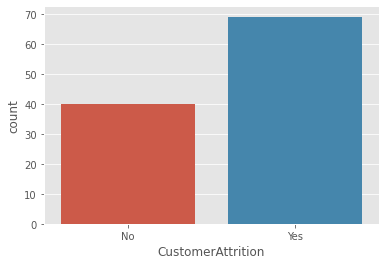

In [35]:
sns.countplot(x = 'CustomerAttrition', data = negative_span)

It looks like Customers having Negative ServiceSpan have more chances to continue the service

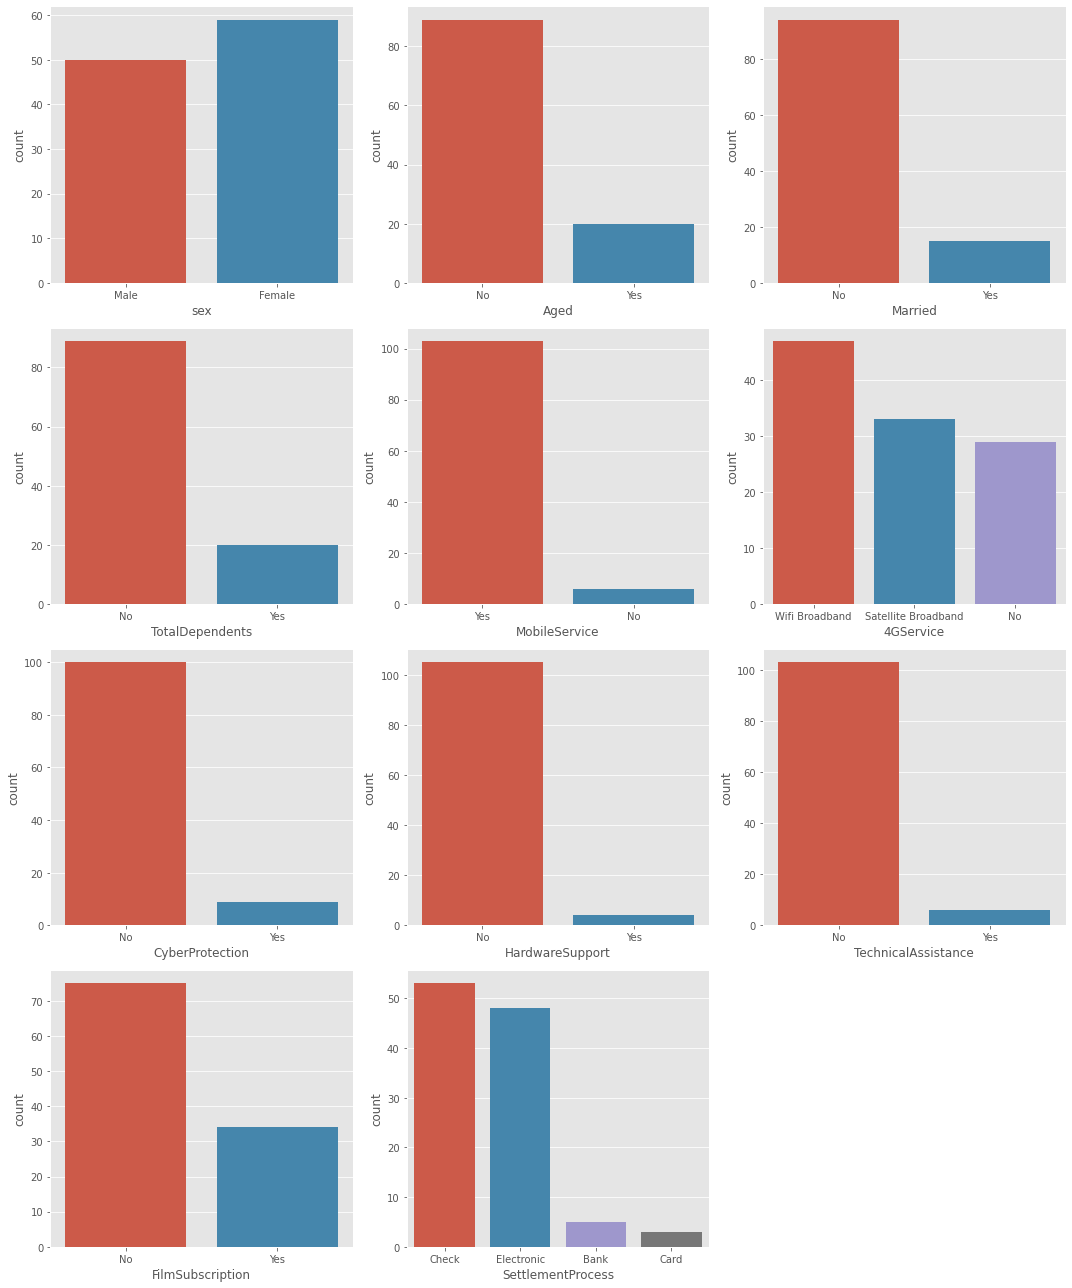

In [36]:
f = plt.figure(figsize = (15, 18))
i =1
for  c in cat:
    f.add_subplot(4, 3, i)
    sns.countplot(c,data=negative_span)
    i+=1
plt.tight_layout()
plt.show()

It looks like most of the customers who have negative ServiceSpan are working because most of them are not married, not aged, not dependent, 

Requiring good internet and mobile service but not interested in CyberProtection, HardwareSupport, FilmSubscription and TechnicalAssistance

It is kind of possible that most of them are FreeLancers who require these services only for a short period of time as their GrandPayment is also low

In [37]:
negative_span[['QuarterlyPayment', 'GrandPayment']].mean()

QuarterlyPayment    52.336241
GrandPayment        51.977262
dtype: float64

Text(0, 0.5, 'Mean Values')

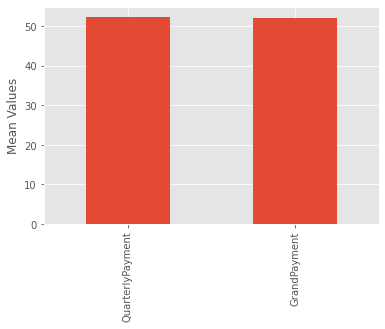

In [38]:
negative_span[['QuarterlyPayment', 'GrandPayment']].mean().plot(kind = 'bar')
plt.ylabel('Mean Values')

Now, it is totally evident that those having negative ServiceSpan are those who require these service only for a short period like freelancers

In [39]:
negative_span.describe()

,ServiceSpan,QuarterlyPayment,GrandPayment
count,109.000000,109.000000,106.000000
mean,-1.009174,52.336241,51.977262
std,0.095783,24.433896,24.711133
min,-2.000000,18.224896,16.297961
25%,-1.000000,25.134435,25.809614
50%,-1.000000,50.003044,48.900397
75%,-1.000000,71.581468,73.422538
max,-1.000000,96.508459,95.572864


Now, Let's have a look at 0 ServiceSpan

In [40]:
zero_span = X_train[X_train['ServiceSpan'] == 0]
zero_span.head()

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment
4818,Male,No,No,No,0,Yes,Wifi Broadband,Yes,No,No,No,Electronic,48.593617,49.295602
5974,Male,No,No,No,0,Yes,Satellite Broadband,No,No,No,Yes,Check,18.408731,46.479958
1505,Female,No,No,No,0,Yes,Satellite Broadband,No,No,No,Yes,Bank,23.943725,22.512351
1857,Female,No,No,No,0,Yes,Wifi Broadband,No,No,No,Yes,Card,18.021227,20.307949
5028,Male,No,No,No,0,Yes,Wifi Broadband,No,No,No,Yes,Card,19.869019,19.760805


In [41]:
zero_span.shape

(164, 14)

In [42]:
zero_span.index

Int64Index([4818, 5974, 1505, 1857, 5028, 3414, 5495, 5773, 5634,  406,
            ...
            2345, 1542, 3402, 5584, 1849, 2528, 3279, 3955, 3534, 5396],
           dtype='int64', length=164)

<AxesSubplot:xlabel='CustomerAttrition', ylabel='count'>

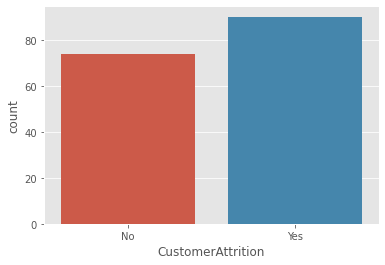

In [43]:
sns.countplot(Y_train[zero_span.index])

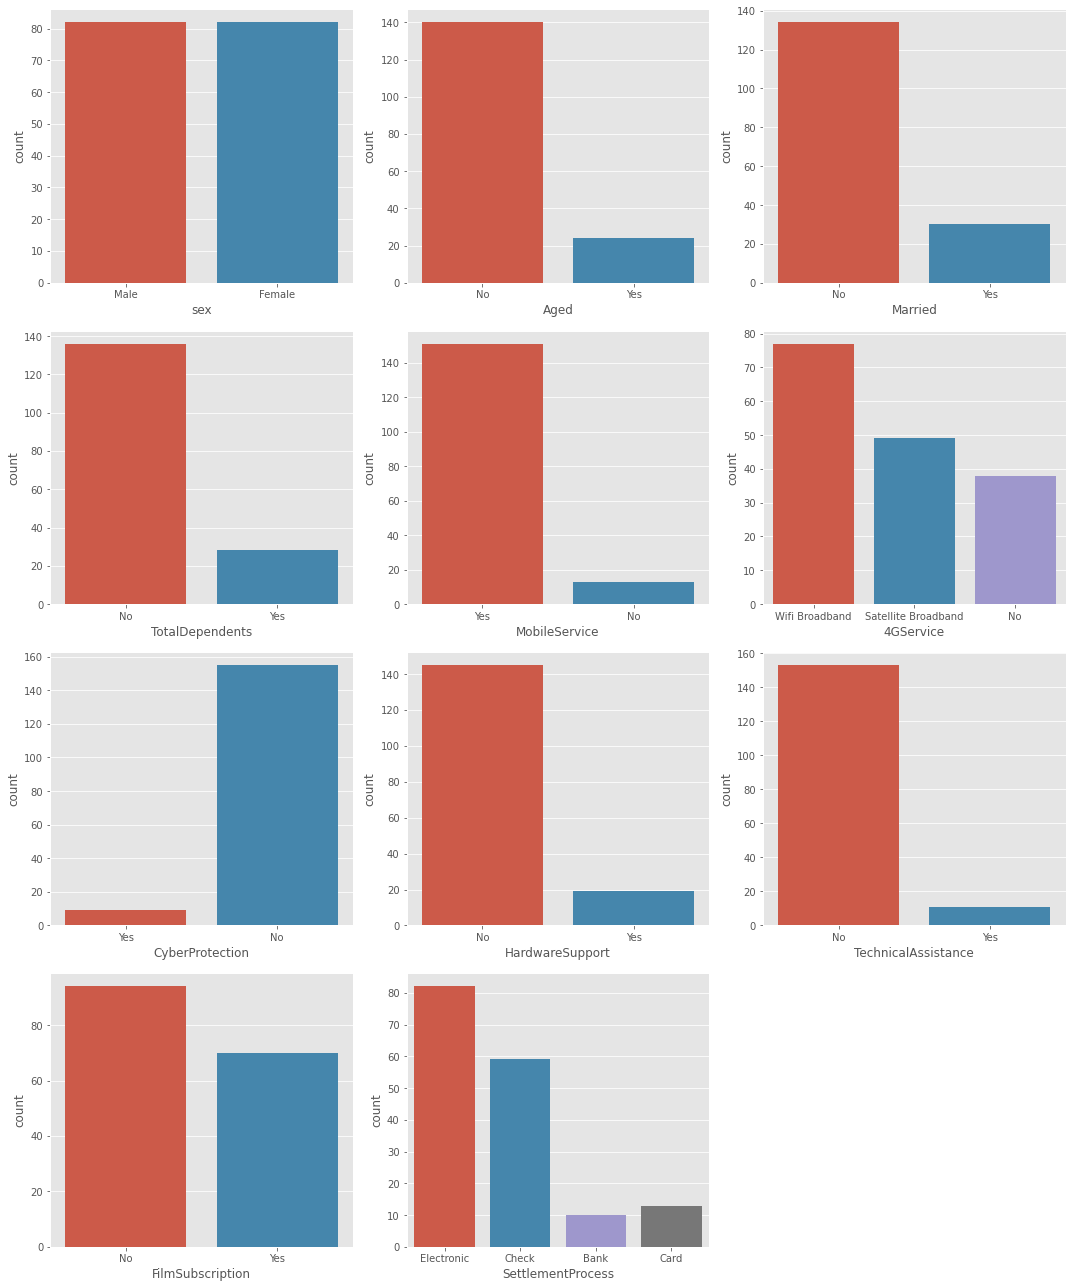

In [44]:
f = plt.figure(figsize = (15, 18))
i =1
for  c in cat:
    f.add_subplot(4, 3, i)
    sns.countplot(c,data=zero_span)
    i+=1
plt.tight_layout()
plt.show()

Like before, Customers having Zero ServiceSpan are also showing almost the same characterstics as those of Negative Service Span

I guess they can be merged i.e, changing the ServiceSpan of those having negative values to 0 would do no harm

In [45]:
zero_span[['QuarterlyPayment', 'GrandPayment']].mean()

QuarterlyPayment    52.989972
GrandPayment        66.646735
dtype: float64

Text(0, 0.5, 'Mean Values')

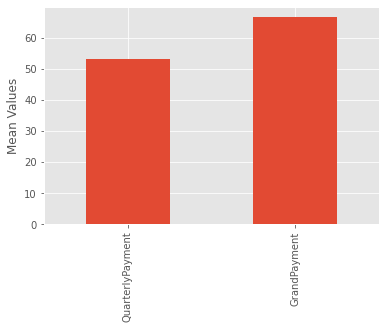

In [46]:
zero_span[['QuarterlyPayment', 'GrandPayment']].mean().plot(kind = 'bar')
plt.ylabel('Mean Values')

In this case the GrandPayment is just little bit more than quaterly payment, may be they took little bit more time than a quater

Now I shall compare the trend of zerospan and negativespan to ensure if i merge both of them then it won't dirupt any trend for the final ML model

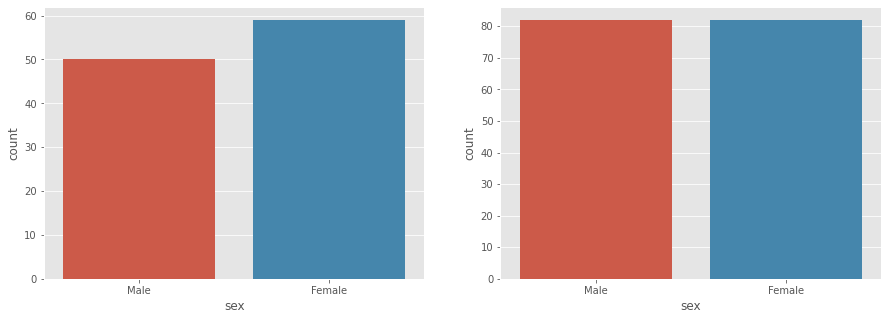

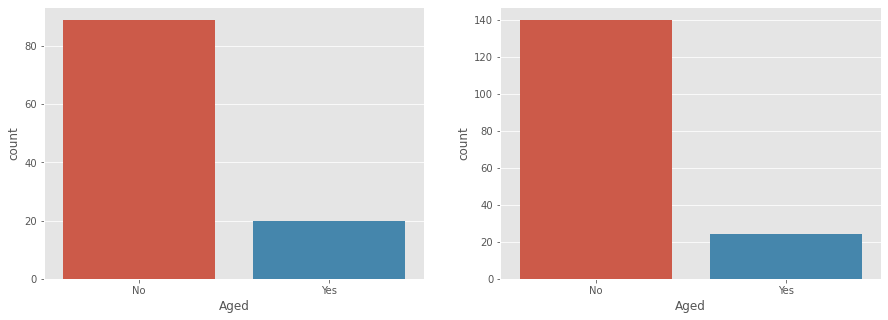

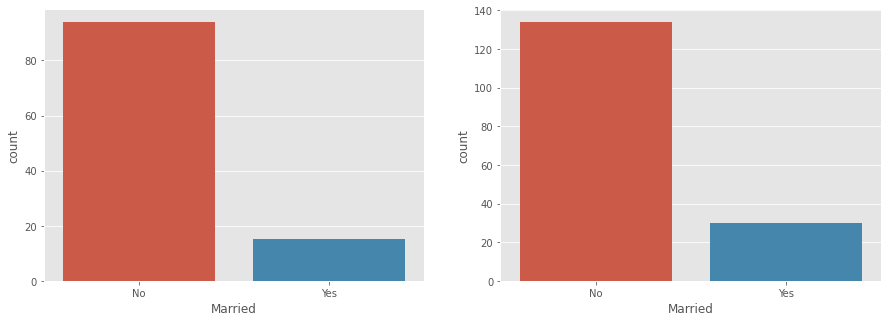

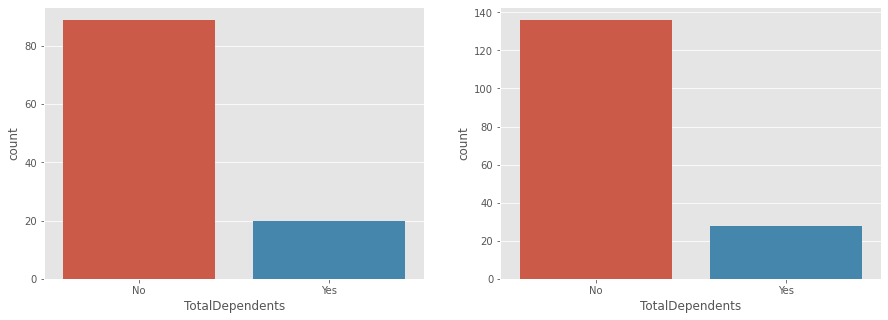

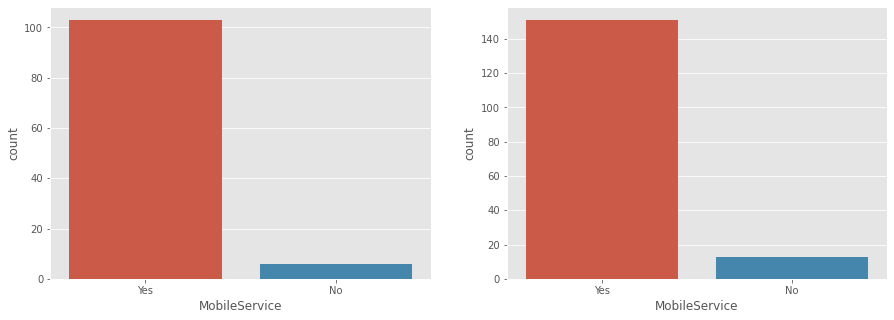

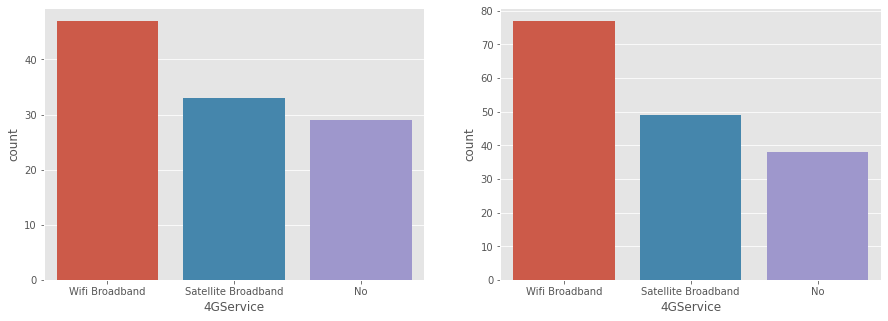

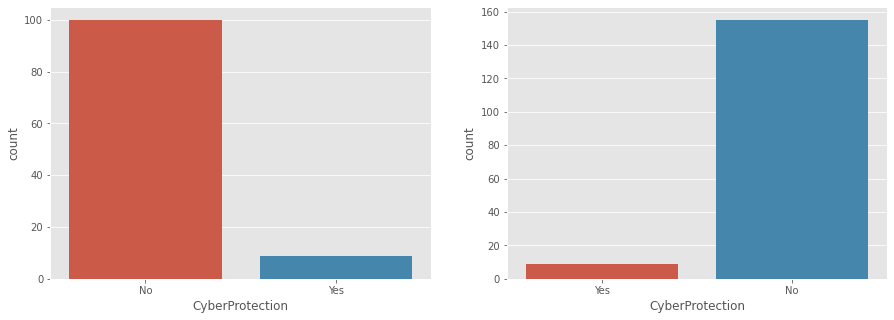

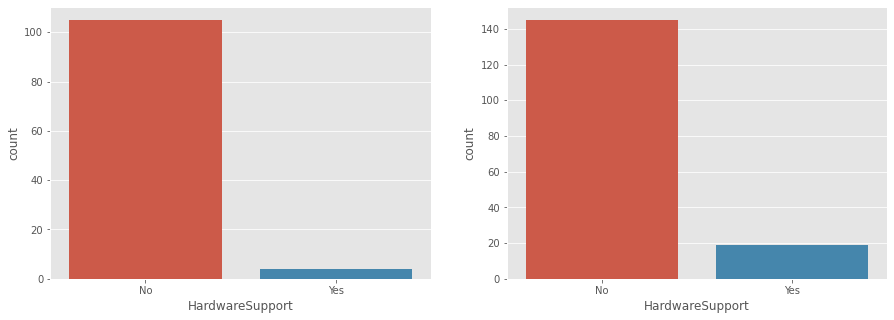

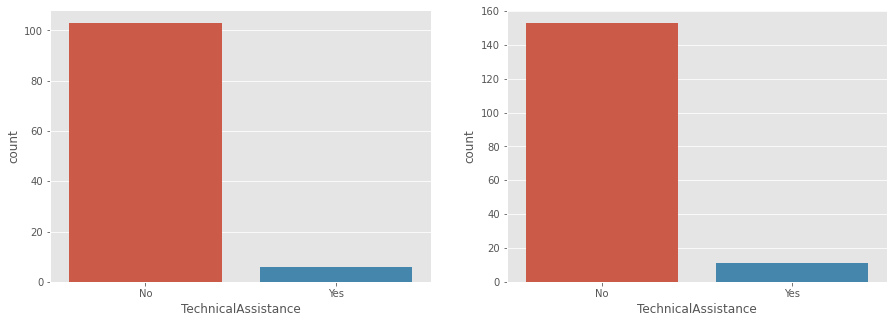

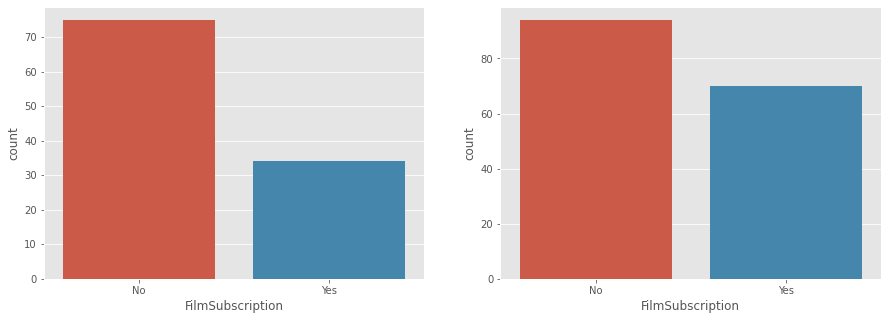

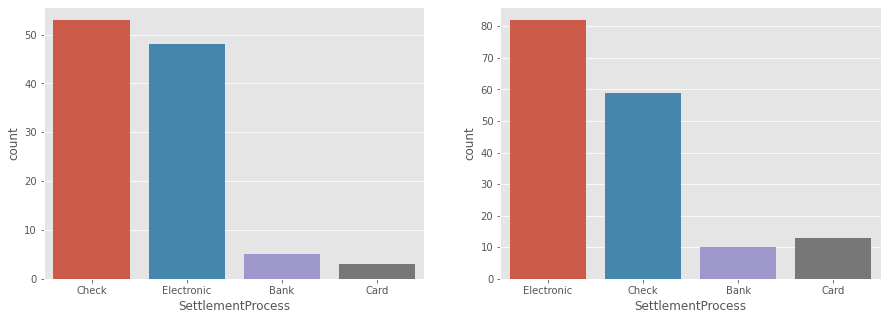

In [47]:
for i in cat:

    fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

    sns.countplot(x = i , data = negative_span, ax = axes[0])
    sns.countplot(x = i , data = zero_span, ax = axes[1])

Except sex all trends are same in both hence if I merge negative values to 0 then it should not affect much our ML model

### Checking missing values and outliers

In [48]:
# We saw above that 'GrandPayment' feature has some missing values
# Checking out the rows having missing 'GrandPayment' values
X_train[X_train['GrandPayment'].isnull()]

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment
1186,Female,No,Yes,Yes,-1,Yes,Satellite Broadband,Yes,Yes,No,No,Check,80.233357,NaN
6203,Male,No,No,Yes,1,Yes,Satellite Broadband,No,No,No,Yes,Check,20.687134,NaN
5796,Male,No,Yes,Yes,1,Yes,Satellite Broadband,No,No,No,Yes,Check,20.075335,NaN
3918,Male,No,Yes,Yes,0,Yes,Satellite Broadband,No,No,No,Yes,Check,19.918643,NaN
1169,Male,No,Yes,Yes,1,Yes,Wifi Broadband,No,Yes,Yes,Yes,Check,73.051308,NaN
3611,Male,No,Yes,Yes,-1,Yes,Satellite Broadband,No,No,No,No,Check,26.212375,NaN
643,Female,No,Yes,Yes,1,Yes,No,No,No,No,Yes,Check,24.055624,NaN
5742,Female,No,Yes,Yes,-2,Yes,Wifi Broadband,Yes,Yes,Yes,No,Card,56.157994,NaN
2281,Female,No,Yes,Yes,1,Yes,No,No,No,No,No,Check,20.607275,NaN


In [49]:
no_payment_index = X_train[X_train['GrandPayment'].isnull()].index

In [50]:
Y_train[no_payment_index]

1186    No
6203    No
5796    No
3918    No
1169    No
3611    No
643     No
5742    No
2281    No
Name: CustomerAttrition, dtype: object

In [51]:
no_payment = pd.concat([X_train[X_train['GrandPayment'].isnull()], Y_train[no_payment_index]], axis = 'columns')
no_payment

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
1186,Female,No,Yes,Yes,-1,Yes,Satellite Broadband,Yes,Yes,No,No,Check,80.233357,NaN,No
6203,Male,No,No,Yes,1,Yes,Satellite Broadband,No,No,No,Yes,Check,20.687134,NaN,No
5796,Male,No,Yes,Yes,1,Yes,Satellite Broadband,No,No,No,Yes,Check,20.075335,NaN,No
3918,Male,No,Yes,Yes,0,Yes,Satellite Broadband,No,No,No,Yes,Check,19.918643,NaN,No
1169,Male,No,Yes,Yes,1,Yes,Wifi Broadband,No,Yes,Yes,Yes,Check,73.051308,NaN,No
3611,Male,No,Yes,Yes,-1,Yes,Satellite Broadband,No,No,No,No,Check,26.212375,NaN,No
643,Female,No,Yes,Yes,1,Yes,No,No,No,No,Yes,Check,24.055624,NaN,No
5742,Female,No,Yes,Yes,-2,Yes,Wifi Broadband,Yes,Yes,Yes,No,Card,56.157994,NaN,No
2281,Female,No,Yes,Yes,1,Yes,No,No,No,No,No,Check,20.607275,NaN,No


It looks like those who have missing grand_payment values were disappointed and did not enroll in the service after quaterly payment and also their ServiceSpan is very less.

Hence, these values are missing not at random

In some cases GrandPayment is lesser than QuarterlyPayment, Let's have a look at that also

In [52]:
lesser_grand_payment = X_train[X_train['GrandPayment'] < X_train['QuarterlyPayment']]
lesser_grand_payment.head()

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment
1489,Male,No,No,Yes,2,No,Satellite Broadband,No,No,No,Yes,Check,20.964141,20.222769
4854,Female,No,No,No,2,Yes,Satellite Broadband,No,No,No,No,Electronic,49.827671,49.648616
624,Female,No,No,No,1,Yes,No,No,No,No,Yes,Electronic,69.173610,69.033848
5320,Female,No,No,No,2,No,Satellite Broadband,No,No,No,Yes,Check,81.757178,78.049791
3591,Female,No,No,No,2,Yes,Satellite Broadband,No,No,No,Yes,Card,44.440846,43.967049


In [53]:
lesser_grand_payment.shape

(243, 14)

In [54]:
lesser_grand_payment_index = X_train[X_train['GrandPayment'] < X_train['QuarterlyPayment']].index

<AxesSubplot:xlabel='CustomerAttrition', ylabel='count'>

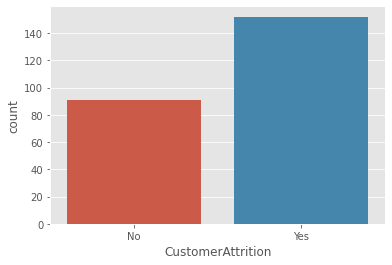

In [55]:
sns.countplot(Y_train[lesser_grand_payment_index])

It looks like, the reason behind the lesser grand payment has nothing to do with CustomerAttribution

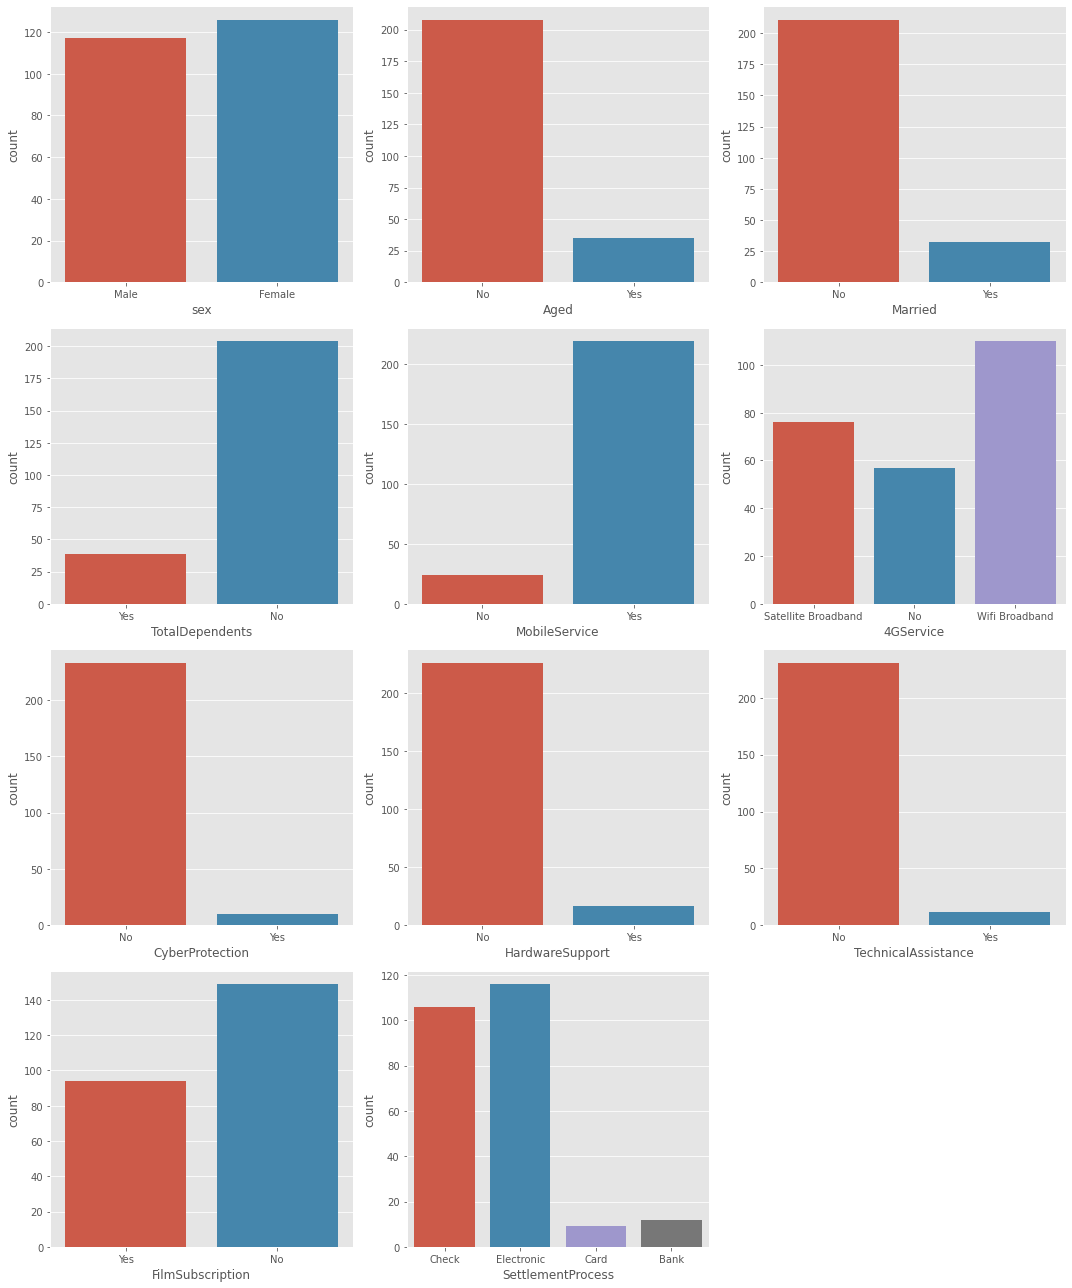

In [56]:
f = plt.figure(figsize = (15, 18))
i =1
for  c in cat:
    f.add_subplot(4, 3, i)
    sns.countplot(c,data=lesser_grand_payment)
    i+=1
plt.tight_layout()
plt.show()

In [57]:
greater_grand_payment = X_train[~(X_train['GrandPayment'] < X_train['QuarterlyPayment'])]
greater_grand_payment.head()

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment
769,Female,Yes,No,No,55,Yes,Wifi Broadband,No,No,No,No,Electronic,89.804996,4931.437050
1456,Male,Yes,Yes,No,58,Yes,Wifi Broadband,No,Yes,No,No,Electronic,98.339137,5867.204745
6326,Male,No,No,No,51,Yes,Wifi Broadband,Yes,Yes,Yes,No,Check,99.021300,5425.362193
2257,Female,No,No,No,41,Yes,Wifi Broadband,No,Yes,No,No,Bank,93.703441,3756.520276
5962,Male,No,No,No,-1,Yes,Wifi Broadband,No,No,No,No,Check,45.824503,46.005585


<AxesSubplot:xlabel='CustomerAttrition', ylabel='count'>

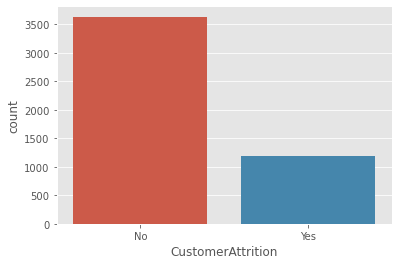

In [58]:
sns.countplot(Y_train[greater_grand_payment.index])

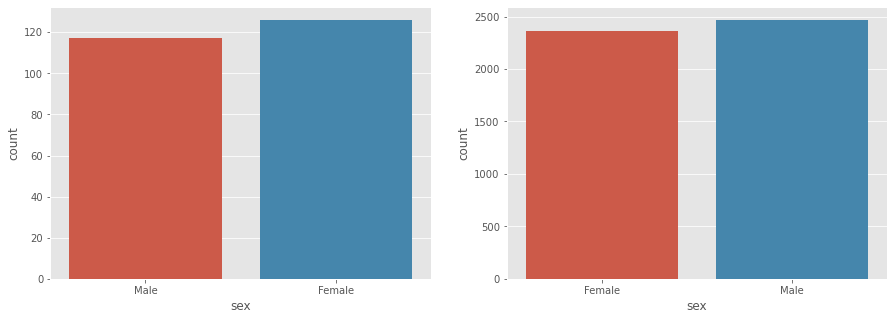

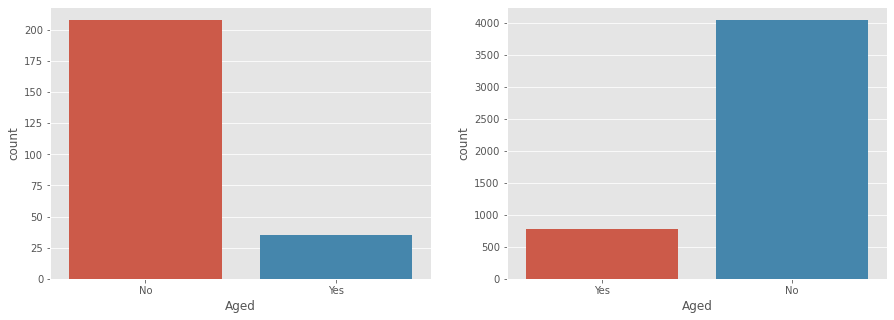

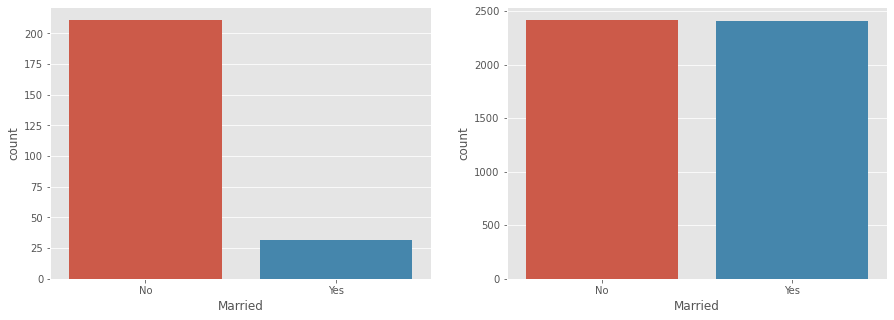

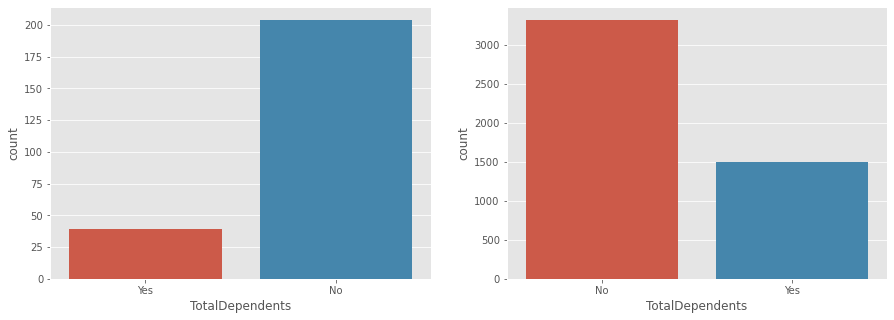

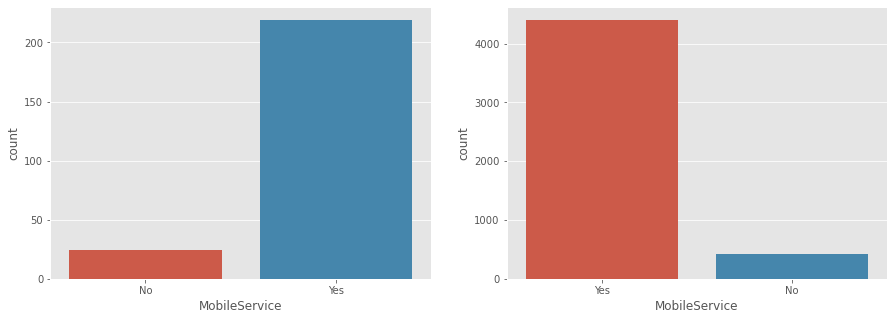

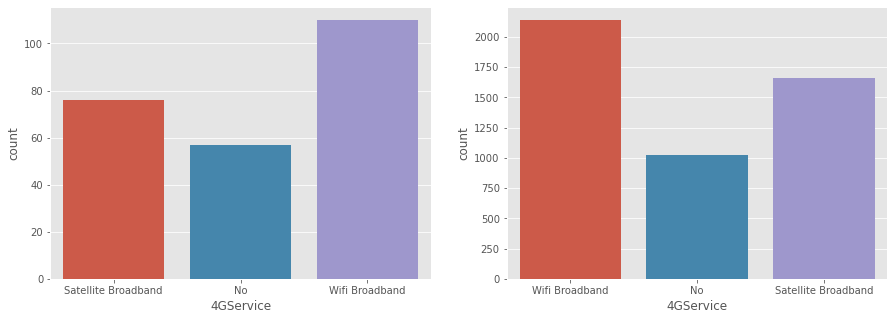

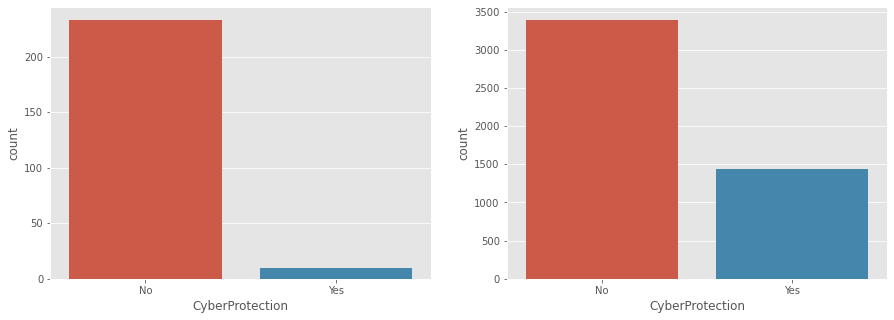

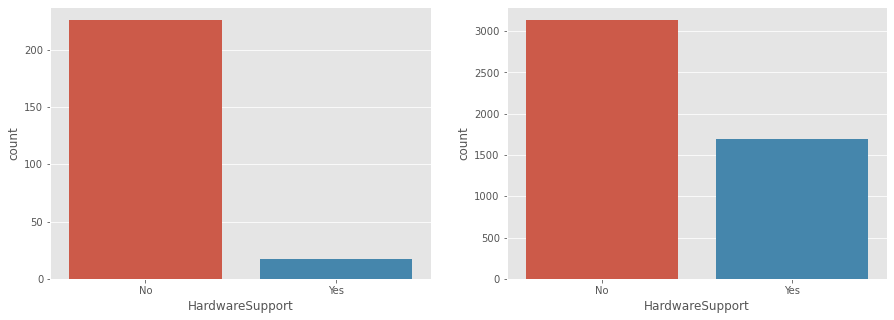

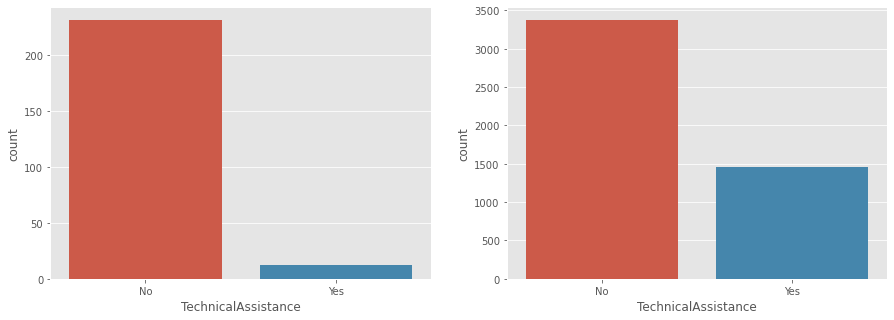

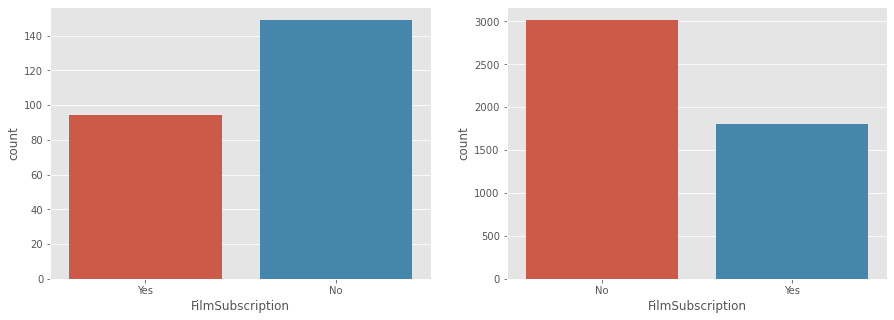

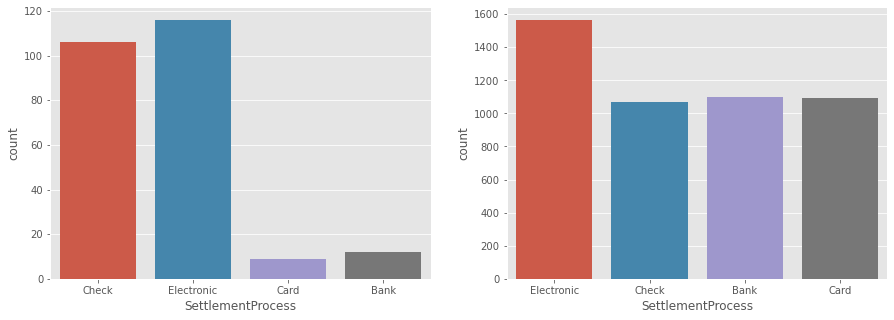

In [59]:
for i in cat:
#    plt.figure(figsize = (12, 6))
    fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
#    plt.subplot(index+1,2,1)
    sns.countplot(x = i , data = lesser_grand_payment, ax = axes[0])
    
#    plt.subplot(index+1, 2, 2)
    sns.countplot(x = i , data = greater_grand_payment, ax = axes[1])

**Checking out categorical features**

In [60]:
X_train[cat].describe()

,sex,Aged,Married,TotalDependents,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess
count,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070
unique,2,2,2,2,2,3,2,2,2,2,4
top,Male,No,No,No,Yes,Wifi Broadband,No,No,No,No,Electronic
freq,2585,4255,2628,3526,4622,2251,3623,3361,3605,3166,1681


In [61]:
# Checking the number of unique values in each column
X_train[cat].nunique()

sex                    2
Aged                   2
Married                2
TotalDependents        2
MobileService          2
4GService              3
CyberProtection        2
HardwareSupport        2
TechnicalAssistance    2
FilmSubscription       2
SettlementProcess      4
dtype: int64

In [62]:
X_train[cat].head()

,sex,Aged,Married,TotalDependents,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess
769,Female,Yes,No,No,Yes,Wifi Broadband,No,No,No,No,Electronic
1456,Male,Yes,Yes,No,Yes,Wifi Broadband,No,Yes,No,No,Electronic
6326,Male,No,No,No,Yes,Wifi Broadband,Yes,Yes,Yes,No,Check
2257,Female,No,No,No,Yes,Wifi Broadband,No,Yes,No,No,Bank
5962,Male,No,No,No,Yes,Wifi Broadband,No,No,No,No,Check


In [63]:
for i in cat:
    print(X_train[i].value_counts(),'\n')

Male      2585
Female    2485
Name: sex, dtype: int64 

No     4255
Yes     815
Name: Aged, dtype: int64 

No     2628
Yes    2442
Name: Married, dtype: int64 

No     3526
Yes    1544
Name: TotalDependents, dtype: int64 

Yes    4622
No      448
Name: MobileService, dtype: int64 

Wifi Broadband         2251
Satellite Broadband    1734
No                     1085
Name: 4GService, dtype: int64 

No     3623
Yes    1447
Name: CyberProtection, dtype: int64 

No     3361
Yes    1709
Name: HardwareSupport, dtype: int64 

No     3605
Yes    1465
Name: TechnicalAssistance, dtype: int64 

No     3166
Yes    1904
Name: FilmSubscription, dtype: int64 

Electronic    1681
Check         1176
Bank          1113
Card          1100
Name: SettlementProcess, dtype: int64 



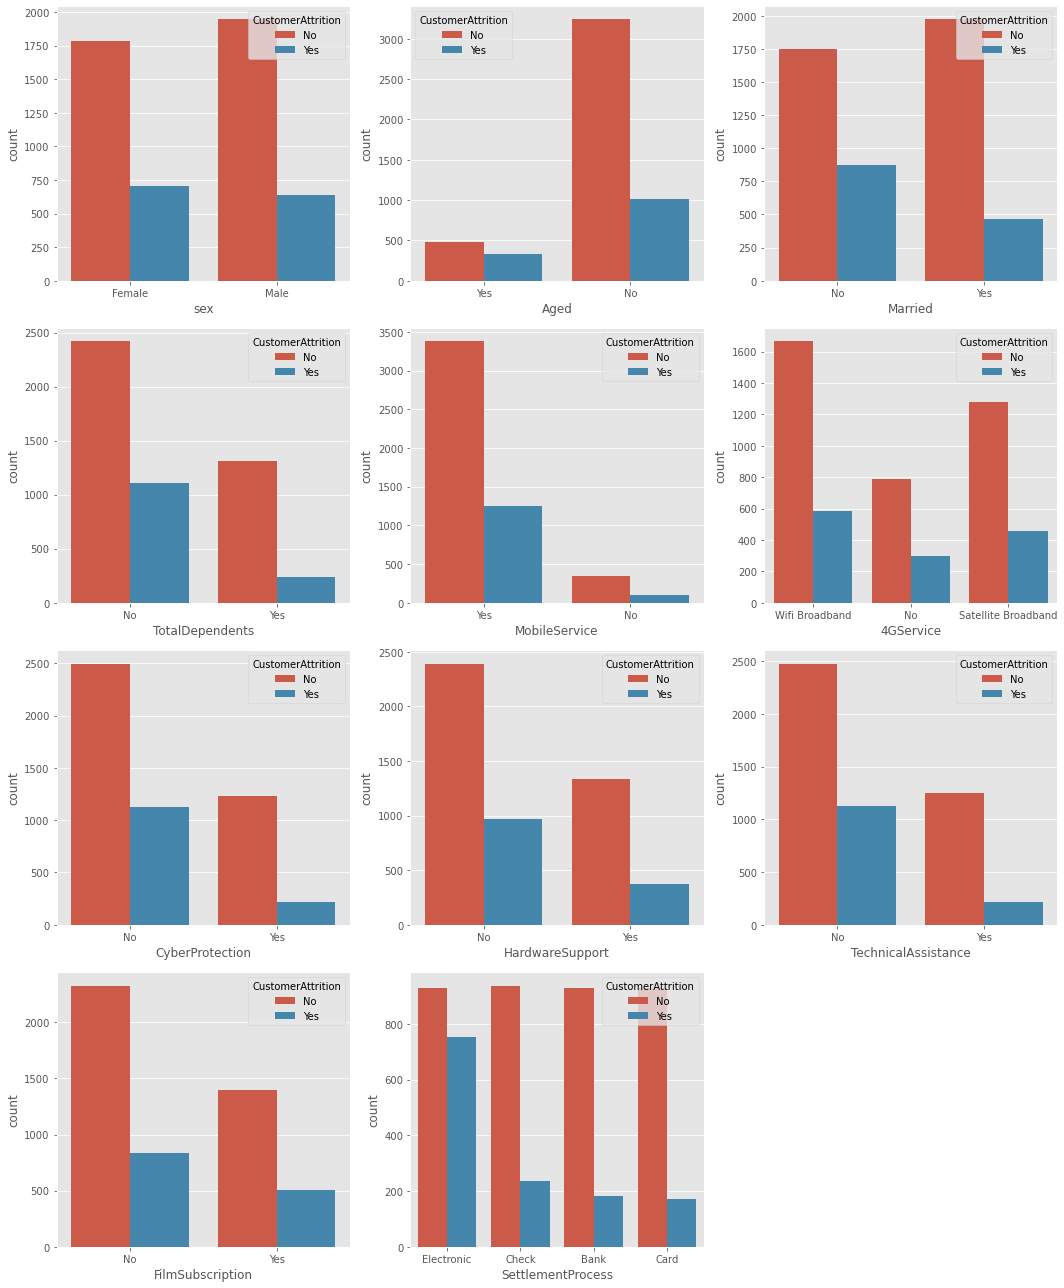

In [64]:
f = plt.figure(figsize = (15, 18))
i =1
for  c in cat:
    f.add_subplot(4, 3, i)
    sns.countplot(c,data=pair, hue = 'CustomerAttrition')
    i+=1
plt.tight_layout()
plt.show()

In [65]:
len(cat)

11

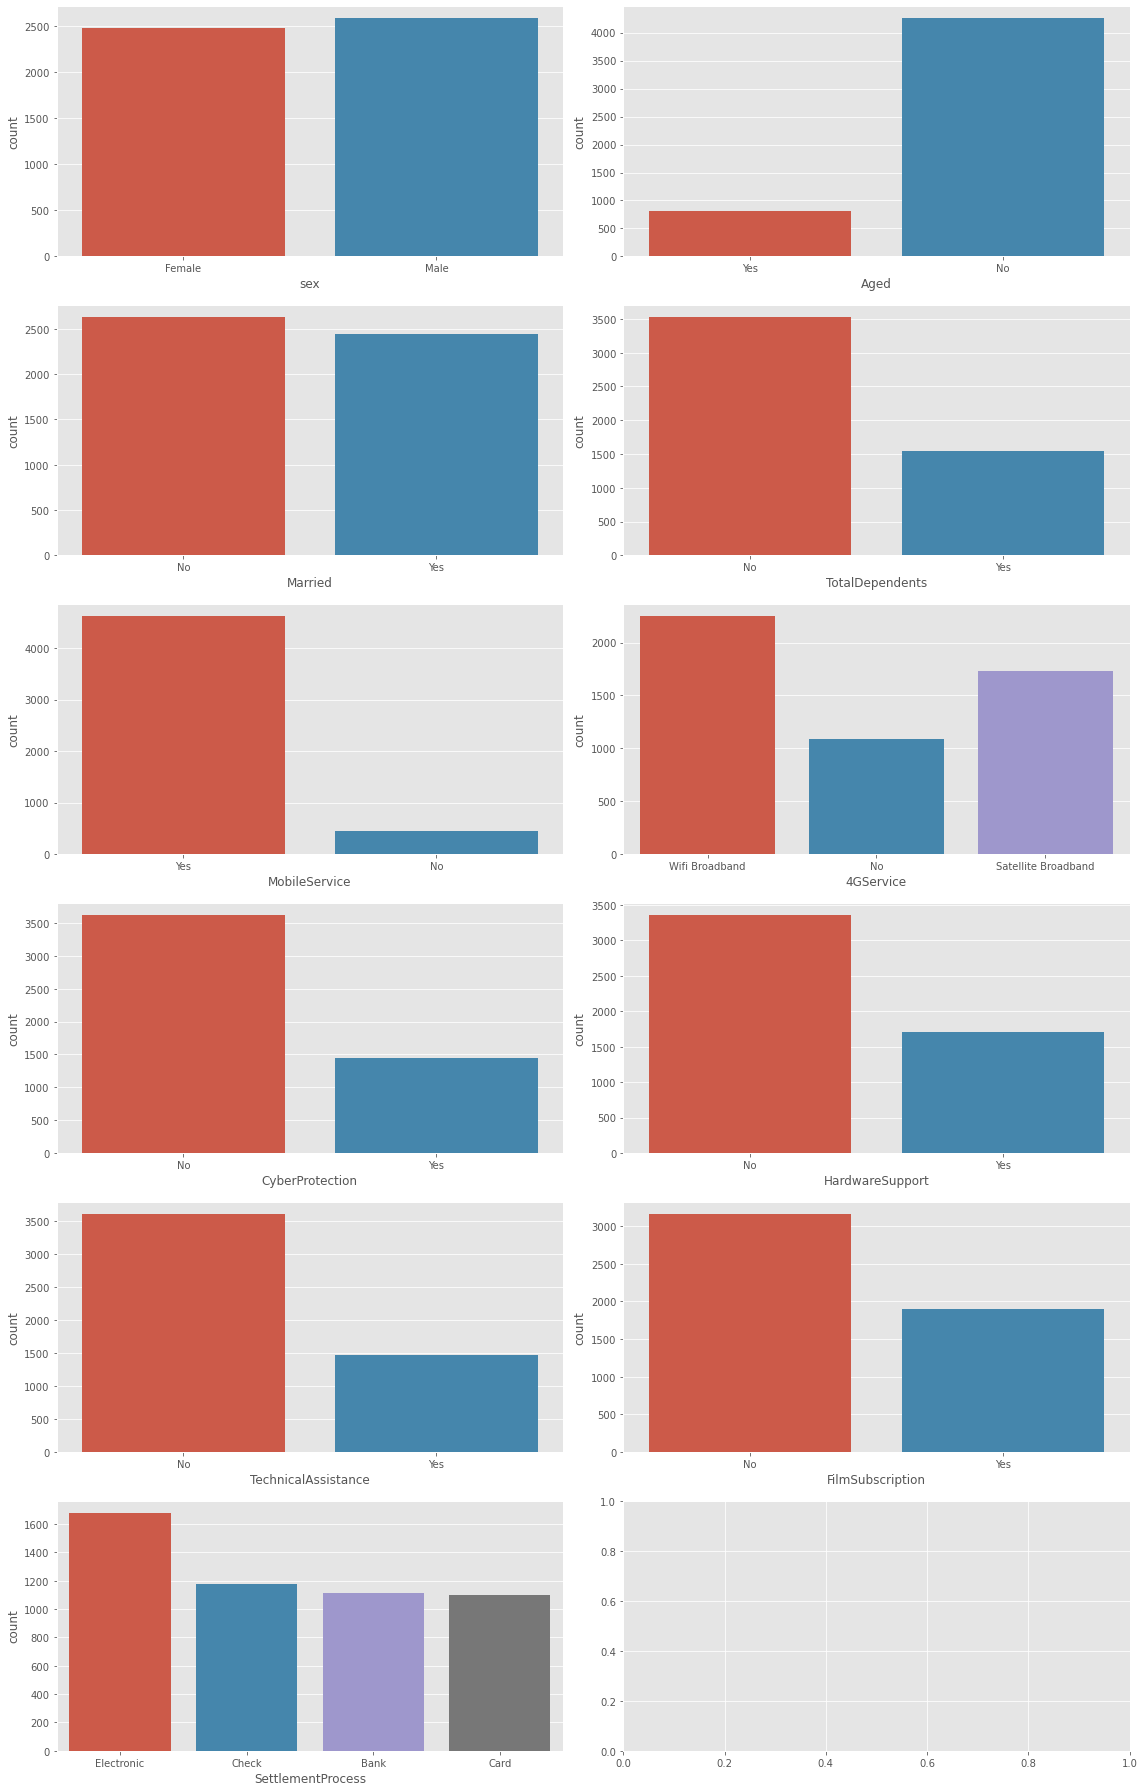

In [66]:
# This is just other method of above visualization, nothing else
fig, ax = plt.subplots(6, 2, figsize = [16,25])
sns.countplot(cat[0], data = X_train, ax = ax[0][0])
sns.countplot(cat[1], data = X_train, ax = ax[0][1])
sns.countplot(cat[2], data = X_train, ax = ax[1][0])
sns.countplot(cat[3], data = X_train, ax = ax[1][1])
sns.countplot(cat[4], data = X_train, ax = ax[2][0])
sns.countplot(cat[5], data = X_train, ax = ax[2][1])
sns.countplot(cat[6], data = X_train, ax = ax[3][0])
sns.countplot(cat[7], data = X_train, ax = ax[3][1])
sns.countplot(cat[8], data = X_train, ax = ax[4][0])
sns.countplot(cat[9], data = X_train, ax = ax[4][1])
sns.countplot(cat[10], data = X_train, ax = ax[5][0])

plt.tight_layout()